# 1.Import Package that we need in the following process

In [52]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
dataset = pd.read_csv('Warehouse_and_Retail_Sales.csv')
print('import package and dataset sucessfully ')


import package and dataset sucessfully 


Brief understanding of the dataset
dataset.shape[0] as number of rows
dataset.shape[1] asnumber of columns 

In [53]:
TotalRow=dataset.shape[0]
TotalCol=dataset.shape[1]
print("Total Row = ",TotalRow)
print("\nTotal Col = ",TotalCol)
print("\nNumber of goods for sale:",len(dataset['ITEM DESCRIPTION'].unique()))
print("\nNumber of supplier:",len(dataset['SUPPLIER'].unique()))
print("\nRetail sales overview: \n",dataset['RETAIL SALES'].describe())
print("\nRetail transfer overview: \n",dataset['RETAIL TRANSFERS'].describe())
print("\nWarehouse sales overview: \n",dataset['RETAIL TRANSFERS'].describe())

Total Row =  128355

Total Col =  9

Number of goods for sale: 23624

Number of supplier: 334

Retail sales overview: 
 count    128355.000000
mean          6.563037
std          28.924944
min          -6.490000
25%           0.000000
50%           0.330000
75%           3.250000
max        1616.600000
Name: RETAIL SALES, dtype: float64

Retail transfer overview: 
 count    128355.000000
mean          7.188161
std          30.640156
min         -27.660000
25%           0.000000
50%           0.000000
75%           4.000000
max        1587.990000
Name: RETAIL TRANSFERS, dtype: float64

Warehouse sales overview: 
 count    128355.000000
mean          7.188161
std          30.640156
min         -27.660000
25%           0.000000
50%           0.000000
75%           4.000000
max        1587.990000
Name: RETAIL TRANSFERS, dtype: float64


Print Header and First 10 rows of dataset

In [54]:
dataset.head(10)

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.0,1.0,0.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.0,1.0,0.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,8.0,0.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.0,2.0,0.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.0,4.0,0.0
5,2017,4,REPUBLIC NATIONAL DISTRIBUTING CO,101680,MANISCHEWITZ CREAM WH CONCORD - 1.5L,WINE,0.0,1.0,0.0
6,2017,4,ROYAL WINE CORP,101753,BARKAN CLASSIC PET SYR - 750ML,WINE,0.0,1.0,0.0
7,2017,4,JIM BEAM BRANDS CO,10197,KNOB CREEK BOURBON 9YR - 100P - 1.75L,LIQUOR,0.0,32.0,0.0
8,2017,4,STE MICHELLE WINE ESTATES,101974,CH ST MICH P/GRIS - 750ML,WINE,0.0,26.0,0.0
9,2017,4,MONSIEUR TOUTON SELECTION,102083,CH DE LA CHESNAIE MUSCADET - 750ML,WINE,0.0,1.0,0.0


Print Tail and last 10 rows of dataset

In [55]:
dataset.tail(10)

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
128345,2018,2,LEGENDS LTD,99730,ERDINGER WEISS NR 12/CS - 16.9OZ,BEER,0.00,0.0,4.0
128346,2018,2,MILLER BREWING COMPANY,99740,MOLSON GOLDEN 2/12 LNNR - 12OZ,BEER,0.00,0.0,193.5
128347,2018,2,LEGENDS LTD,99741,DON DE DIEU 6/4 NR - 12OZ,BEER,0.68,2.0,0.0
128348,2018,2,LEGENDS LTD,99753,DUTCHESS DE BOURGOGNE NR - 750ML,BEER,0.00,0.0,2.0
128349,2018,2,COASTAL BREWING COMPANY LLC,99813,DOMINION OAK BARREL STOUT 1/2K,KEGS,0.00,0.0,2.0
128350,2018,2,ANHEUSER BUSCH INC,9997,HOEGAARDEN 4/6NR - 12OZ,BEER,66.46,59.0,212.0
128351,2018,2,COASTAL BREWING COMPANY LLC,99970,DOMINION OAK BARREL STOUT 4/6 NR - 12OZ,BEER,9.08,7.0,35.0
128352,2018,2,BOSTON BEER CORPORATION,99988,SAM ADAMS COLD SNAP 1/6 KG,KEGS,0.00,0.0,32.0
128353,2018,2,NaN,BC,BEER CREDIT,REF,0.00,0.0,-35.0
128354,2018,2,NaN,WC,WINE CREDIT,REF,0.00,0.0,-81.0


# 2.Analysis according to Item Type

Simple data processing and count, drop NA, play the coloumn of "ITEM TYPE"

In [61]:
dataset=dataset.dropna()
Item_count=dataset['ITEM TYPE'].value_counts()
print(Item_count)
print("Unique Items",dataset['ITEM TYPE'].unique())


WINE            79077
LIQUOR          28397
BEER            16425
KEGS             3638
NON-ALCOHOL       628
STR_SUPPLIES      106
REF                35
DUNNAGE            24
Name: ITEM TYPE, dtype: int64
Unique Items ['WINE' 'LIQUOR' 'BEER' 'STR_SUPPLIES' 'REF' 'NON-ALCOHOL' 'KEGS'
 'DUNNAGE']


generate the barchart and pie chart to represent the sales of each item type

Text(0.5, 1.0, 'Item Type Count - Top 5 - bar chart')

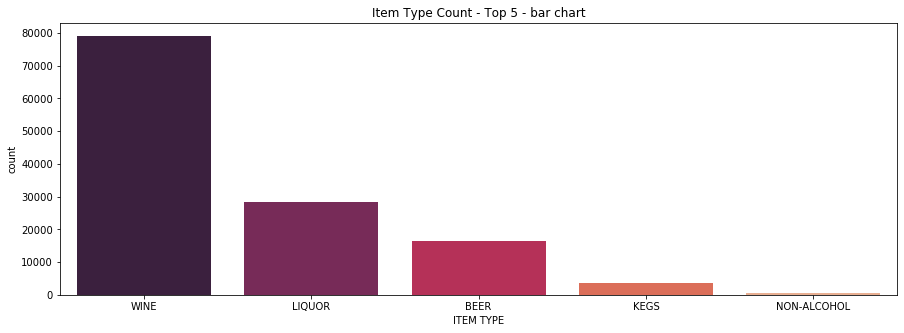

In [57]:
plt.figure(figsize=(15,5))
sn.countplot(dataset["ITEM TYPE"], order=Item_count.nlargest(5).index,palette="rocket" )
#without normalization
plt.title('Item Type Count - Top 5 - bar chart')




Text(0, 0.5, 'Item')

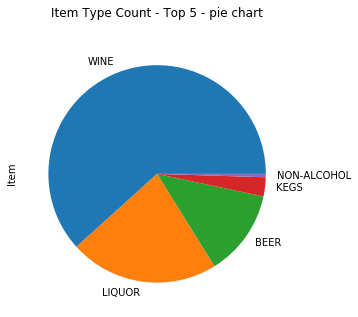

In [58]:
plt.figure(figsize=(10,5))

dataset['ITEM TYPE'].value_counts().nlargest(5).plot(kind='pie')
plt.title('Item Type Count - Top 5 - pie chart\n')
plt.ylabel('Item')

compare the monthly sales of different item types
1.create another column, merge the year and month for data processing
2.process data for visualization
3.visualization by multiple bar chart

In [59]:
dataset['DATE']=pd.to_datetime(dataset[['YEAR','MONTH']].assign(Day=1)).dt.date
dataset.dtypes
dataset.head(10)

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES,DATE
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.0,1.0,0.0,2017-04-01
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.0,1.0,0.0,2017-04-01
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,8.0,0.0,2017-04-01
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.0,2.0,0.0,2017-04-01
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.0,4.0,0.0,2017-04-01
5,2017,4,REPUBLIC NATIONAL DISTRIBUTING CO,101680,MANISCHEWITZ CREAM WH CONCORD - 1.5L,WINE,0.0,1.0,0.0,2017-04-01
6,2017,4,ROYAL WINE CORP,101753,BARKAN CLASSIC PET SYR - 750ML,WINE,0.0,1.0,0.0,2017-04-01
7,2017,4,JIM BEAM BRANDS CO,10197,KNOB CREEK BOURBON 9YR - 100P - 1.75L,LIQUOR,0.0,32.0,0.0,2017-04-01
8,2017,4,STE MICHELLE WINE ESTATES,101974,CH ST MICH P/GRIS - 750ML,WINE,0.0,26.0,0.0,2017-04-01
9,2017,4,MONSIEUR TOUTON SELECTION,102083,CH DE LA CHESNAIE MUSCADET - 750ML,WINE,0.0,1.0,0.0,2017-04-01


In [113]:
dataloading=dataset[['DATE','ITEM TYPE','RETAIL SALES']].groupby(['DATE','ITEM TYPE']).sum()
dataloading=dataloading.unstack().fillna(0)
dataloading.columns
dataloading['RETAIL SALES']

ITEM TYPE,BEER,DUNNAGE,KEGS,LIQUOR,NON-ALCOHOL,REF,STR_SUPPLIES,WINE
DATE,,,,,,,,
2017-04-01,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00
2017-05-01,25023.24,0.0,0.0,35123.36,0.00,0.00,0.00,34546.89
2017-06-01,27863.26,0.0,0.0,35035.31,1209.23,30.60,89.22,33129.64
2017-08-01,23030.13,0.0,0.0,32186.04,1091.28,19.54,77.34,30707.45
2017-09-01,23852.76,0.0,0.0,32532.32,997.11,38.88,94.64,32936.89
2017-10-01,22583.78,0.0,0.0,32491.59,945.63,22.82,84.38,33108.76
2017-11-01,23341.14,0.0,0.0,35524.77,1005.19,63.11,106.06,38275.92
2017-12-01,28822.16,0.0,0.0,49522.28,1316.44,41.21,439.64,51492.76
2018-01-01,16606.33,0.0,0.0,28579.87,732.25,23.66,56.94,29792.72


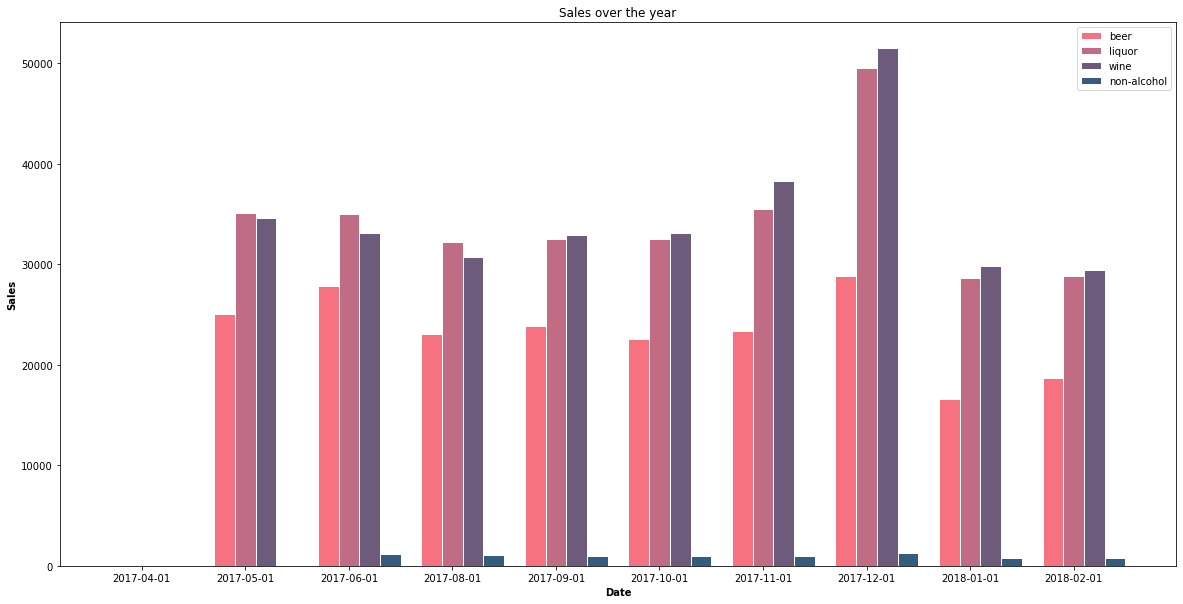

In [51]:
 plt.figure(figsize=(20,10))

# set width of bar
barWidth = 0.2
 
# set height of bar
barbeer = dataloading[('RETAIL SALES','BEER')]
barliquor=dataloading[('RETAIL SALES','LIQUOR')]
barwine=dataloading[('RETAIL SALES','WINE')]
barnonalcohol=dataloading[('RETAIL SALES','NON-ALCOHOL')]

 
# Set position of bar on X axis
r1 = np.arange(len(barbeer))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

# Make the plot
plt.bar(r1, barbeer, color='#f67280', width=barWidth, edgecolor='white', label='beer')
plt.bar(r2, barliquor, color='#c06c84', width=barWidth, edgecolor='white', label='liquor')
plt.bar(r3, barwine, color='#6c5b7b', width=barWidth, edgecolor='white', label='wine')
plt.bar(r4, barnonalcohol, color='#355c7d', width=barWidth, edgecolor='white', label='non-alcohol')
 
# Add xticks on the middle of the group bars
plt.title("Sales over the year")
plt.xlabel('Date', fontweight='bold')
plt.ylabel('Sales', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(dataloading.index))], dataloading.index)
 
# Create legend & Show graphic
plt.legend()
plt.show()


# 3.Analyze the supplier

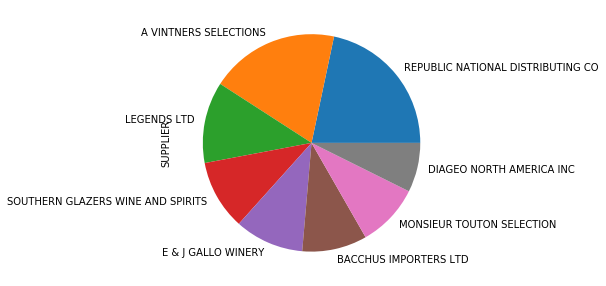

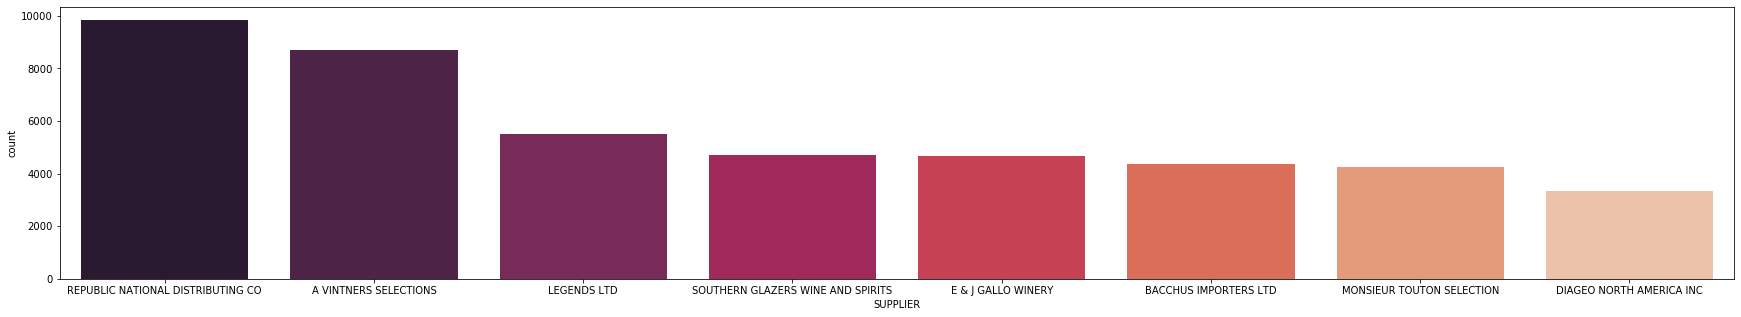

In [67]:
plt.figure(figsize=(15,5))

dataset['SUPPLIER'].value_counts().nlargest(8).plot(kind='pie')
plt.figure(figsize=(30,5))
sn.countplot(dataset["SUPPLIER"], order=dataset['SUPPLIER'].value_counts().nlargest(8).index,palette="rocket" )

In [114]:
suplargest=dataset['SUPPLIER'].value_counts().nlargest(4).index
print(suplargest)
supdata=dataset[dataset['SUPPLIER'].isin(suplargest)]
print("supdata",supdata['SUPPLIER'].unique())
supdata=supdata[['DATE','SUPPLIER','WAREHOUSE SALES']].groupby(['DATE','SUPPLIER']).sum()

supdata=supdata.unstack(level=-1).fillna(0)
supdata['WAREHOUSE SALES']

Index(['REPUBLIC NATIONAL DISTRIBUTING CO', 'A VINTNERS SELECTIONS',
       'LEGENDS LTD', 'SOUTHERN GLAZERS WINE AND SPIRITS'],
      dtype='object')
supdata ['REPUBLIC NATIONAL DISTRIBUTING CO' 'A VINTNERS SELECTIONS' 'LEGENDS LTD'
 'SOUTHERN GLAZERS WINE AND SPIRITS']


SUPPLIER,A VINTNERS SELECTIONS,LEGENDS LTD,REPUBLIC NATIONAL DISTRIBUTING CO,SOUTHERN GLAZERS WINE AND SPIRITS
DATE,,,,
2017-04-01,0.00,0.00,0.00,0.00
2017-05-01,3340.36,3775.66,3742.91,1525.33
2017-06-01,3259.26,4992.31,3349.56,1321.76
2017-08-01,3098.68,4346.01,3056.85,1490.44
2017-09-01,2975.51,3669.10,2889.18,1449.43
2017-10-01,3127.51,3787.63,2865.75,1592.43
2017-11-01,4018.34,5045.08,3354.16,1981.84
2017-12-01,3548.00,3530.49,3182.47,2028.13
2018-01-01,3176.50,3559.30,2756.51,1297.09


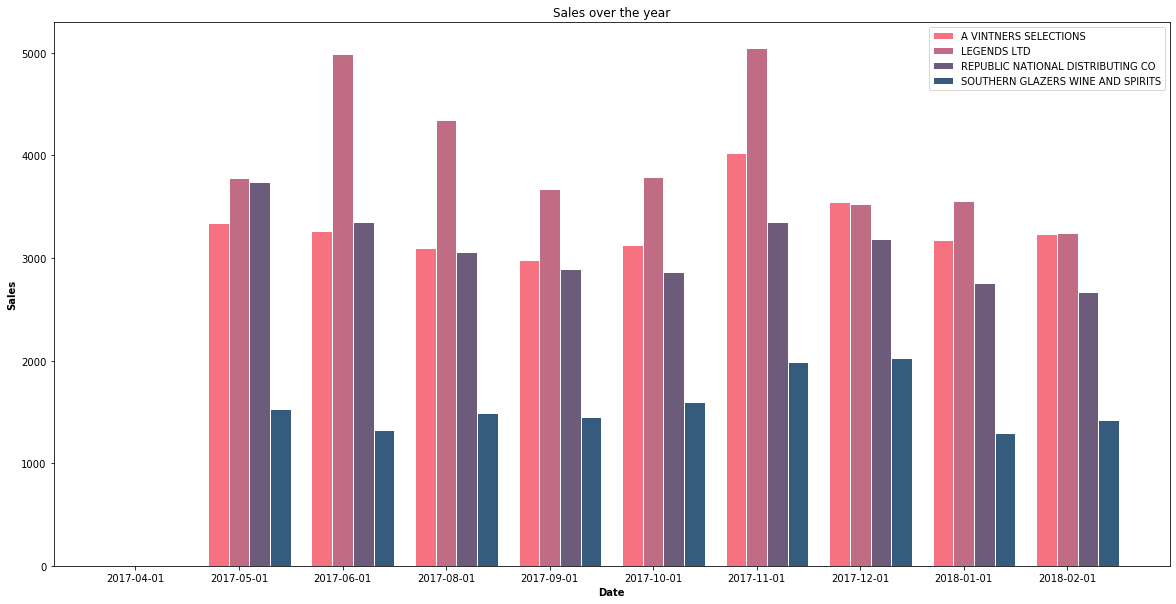

In [119]:
 plt.figure(figsize=(20,10))

# set width of bar
barWidth = 0.2
 
# set height of bar
bar1 = supdata[('WAREHOUSE SALES','A VINTNERS SELECTIONS')]
bar2 = supdata[('WAREHOUSE SALES','LEGENDS LTD')]
bar3 = supdata[('WAREHOUSE SALES','REPUBLIC NATIONAL DISTRIBUTING CO')]
bar4 = supdata[('WAREHOUSE SALES','SOUTHERN GLAZERS WINE AND SPIRITS')]

 
# Set position of bar on X axis
r1 = np.arange(len(bar1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

# Make the plot
plt.bar(r1, bar1, color='#f67280', width=barWidth, edgecolor='white', label='A VINTNERS SELECTIONS')
plt.bar(r2, bar2, color='#c06c84', width=barWidth, edgecolor='white', label='LEGENDS LTD')
plt.bar(r3, bar3, color='#6c5b7b', width=barWidth, edgecolor='white', label='REPUBLIC NATIONAL DISTRIBUTING CO')
plt.bar(r4, bar4, color='#355c7d', width=barWidth, edgecolor='white', label='SOUTHERN GLAZERS WINE AND SPIRITS')
 
# Add xticks on the middle of the group bars
plt.title("Sales over the year")
plt.xlabel('Date', fontweight='bold')
plt.ylabel('Sales', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(supdata.index))], supdata.index)
 
# Create legend & Show graphic
plt.legend()
plt.show()
